# Conociendo los datos
Se utiliza el dataset wine de la url  "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data".
Se realizo un análisis exploratorio, separando por categoria la variable class.

In [17]:
# Importación de librerías.
# ==============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import graphviz 

In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)

In [ ]:
# Definición de estilo de gráficas.
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
# ==============================================================================
#plt.style.use("seaborn-whitegrid") realice el cambio porque este tipo no esta en mi matplotlib
plt.style.use("seaborn-v0_8-whitegrid")

In [ ]:
# Datos de la base "Wine".
# ==============================================================================
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

In [ ]:
# Nombre de los atributos y de la variable target.
# ==============================================================================
names = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols',
           'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue',
           'OD280/OD315_of_diluted_wines', 'Proline']

In [ ]:
# Generación del dataframe que contiene a los datos y los encabezados de columna.
# ==============================================================================
wine = pd.read_csv(url, names = names)

In [ ]:
# Dimensión del dataframe.
# ==============================================================================
wine.shape

In [ ]:
# Balance del dataset.
# ==============================================================================
wine['Class'].value_counts()

In [ ]:
# Comprobación de valores faltantes.
# ==============================================================================
wine.isnull().sum(axis=0)

In [ ]:
# Estimación de la asimetría (Skewness).
# ==============================================================================
wine.drop('Class', axis=1).skew()

In [ ]:
# Estimación de la curtosis.
# ==============================================================================
wine.drop('Class', axis=1).kurt()

In [ ]:
# Generación de dataframe para cada especie.
# ==============================================================================
wine['Class'].unique()

In [ ]:
filt = (wine['Class'] == 1)
Tipo_01 = wine.loc[filt]

In [ ]:
filt = (wine['Class'] == 2)
Tipo_02 = wine.loc[filt]

In [ ]:
filt = (wine['Class'] == 3)
Tipo_03 = wine.loc[filt]

In [ ]:
wine.describe()

In [ ]:
# Proline [cm].
# ==============================================================================
var = 'Proline'
var_title = 'Prolina' #uno de los aminoácidos que forman las proteínas de los seres vivos'

# Ajustes de la figura de Matplotlib.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot.
sns.boxplot(data=wine[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma.
sns.histplot(data=wine[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad.
sns.kdeplot(data=wine[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()


In [ ]:
# Color_intensity [cm].
# ==============================================================================
var = 'Color_intensity'
var_title = 'Intensidad del color'

# Ajustes de la figura de Matplotlib.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot.
sns.boxplot(data=wine[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma.
sns.histplot(data=wine[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad.
sns.kdeplot(data=wine[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado del ' + var_title)

plt.tight_layout()

In [ ]:
# Flavanois [cm].
# ==============================================================================
var = 'Flavanoids'
var_title = 'Flavonoides' #término genérico con que se identifica a una serie de metabolitos secundarios de las plantas.

# Ajustes de la figura de Matplotlib.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot.
sns.boxplot(data=wine[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma.
sns.histplot(data=wine[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad.
sns.kdeplot(data=wine[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de ' + var_title)

plt.tight_layout()


In [ ]:
# Magnesio [cm].
# ==============================================================================
var = 'Magnesium'
var_title = 'Magnesio'

# Ajustes de la figura de Matplotlib.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot.
sns.boxplot(data=wine[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma.
sns.histplot(data=wine[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad.
sns.kdeplot(data=wine[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado del ' + var_title)

plt.tight_layout()

In [ ]:
# Proline vs Tipo de vino.
# ==============================================================================
var = 'Proline'
var_title = 'Prolina'

# Ajustes de la figura de Matplotlib.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie.
sns.histplot(data=Tipo_01, x=var, label='Tipo_01', color='blue', kde=False, ax=ax[0])
sns.histplot(data=Tipo_02, x=var, label='Tipo_02', color='orange', kde=False, ax=ax[0])
sns.histplot(data=Tipo_03, x=var, label='Tipo_03', color='green', kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
ax[0].legend()

# Curva de densidad para cada especie.
sns.kdeplot(data=Tipo_01, x=var, label='Tipo_01', fill=True, ax=ax[1])
sns.kdeplot(data=Tipo_02, x=var, label='Tipo_02', fill=True, ax=ax[1])
sns.kdeplot(data=Tipo_03, x=var, label='Tipo_03', fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

In [ ]:
var = 'Proline'
var_title = 'Prolina'

# Ajustes de la figura de Matplotlib.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el diagrama de violín.
sns.violinplot(data=wine, x='Class', y=var, ax=ax[0], hue='Class')
ax[0].set_xlabel('Tipos')
ax[0].set_ylabel(var_title)
ax[0].get_legend().remove()

# Plotea el boxplot.
sns.boxplot(data=wine, x='Class', y=var, ax=ax[1], width=.4)
ax[1].set_xlabel('Tipos')
ax[1].set_ylabel(var_title)

plt.tight_layout()

In [ ]:
# Proline vs Tipo de vino.
# ==============================================================================
var = 'Color_intensity'
var_title = 'Intensidad del color'

# Ajustes de la figura de Matplotlib.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie.
sns.histplot(data=Tipo_01, x=var, label='Tipo_01', color='blue', kde=False, ax=ax[0])
sns.histplot(data=Tipo_02, x=var, label='Tipo_02', color='orange', kde=False, ax=ax[0])
sns.histplot(data=Tipo_03, x=var, label='Tipo_03', color='green', kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
ax[0].legend()

# Curva de densidad para cada especie.
sns.kdeplot(data=Tipo_01, x=var, label='Tipo_01', fill=True, ax=ax[1])
sns.kdeplot(data=Tipo_02, x=var, label='Tipo_02', fill=True, ax=ax[1])
sns.kdeplot(data=Tipo_03, x=var, label='Tipo_03', fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

In [ ]:
var = 'Color_intensity'
var_title = 'Intensidad del color'

# Ajustes de la figura de Matplotlib.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el diagrama de violín.
sns.violinplot(data=wine, x='Class', y=var, ax=ax[0], hue='Class')
ax[0].set_xlabel('Tipos')
ax[0].set_ylabel(var_title)
ax[0].get_legend().remove()

# Plotea el boxplot.
sns.boxplot(data=wine, x='Class', y=var, ax=ax[1], width=.4)
ax[1].set_xlabel('Tipos')
ax[1].set_ylabel(var_title)

plt.tight_layout()

In [ ]:
# ==============================================================================
var = 'Flavanoids'
var_title = 'Flavanoides'

# Ajustes de la figura de Matplotlib.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie.
sns.histplot(data=Tipo_01, x=var, label='Tipo_01', color='blue', kde=False, ax=ax[0])
sns.histplot(data=Tipo_02, x=var, label='Tipo_02', color='orange', kde=False, ax=ax[0])
sns.histplot(data=Tipo_03, x=var, label='Tipo_03', color='green', kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
ax[0].legend()

# Curva de densidad para cada especie.
sns.kdeplot(data=Tipo_01, x=var, label='Tipo_01', fill=True, ax=ax[1])
sns.kdeplot(data=Tipo_02, x=var, label='Tipo_02', fill=True, ax=ax[1])
sns.kdeplot(data=Tipo_03, x=var, label='Tipo_03', fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

In [ ]:
var = 'Flavanoids'
var_title = 'Flavanoides'

# Ajustes de la figura de Matplotlib.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el diagrama de violín.
sns.violinplot(data=wine, x='Class', y=var, ax=ax[0], hue='Class')
ax[0].set_xlabel('Tipo')
ax[0].set_ylabel(var_title)
ax[0].get_legend().remove()

# Plotea el boxplot.
sns.boxplot(data=wine, x='Class', y=var, ax=ax[1], width=.4)
ax[1].set_xlabel('Tipo')
ax[1].set_ylabel(var_title)

plt.tight_layout()

In [ ]:
# ==============================================================================
var = 'Magnesium'
var_title = 'Magnesio'

# Ajustes de la figura de Matplotlib.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie.
sns.histplot(data=Tipo_01, x=var, label='Tipo_01', color='blue', kde=False, ax=ax[0])
sns.histplot(data=Tipo_02, x=var, label='Tipo_02', color='orange', kde=False, ax=ax[0])
sns.histplot(data=Tipo_03, x=var, label='Tipo_03', color='green', kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
ax[0].legend()

# Curva de densidad para cada especie.
sns.kdeplot(data=Tipo_01, x=var, label='Tipo_01', fill=True, ax=ax[1])
sns.kdeplot(data=Tipo_02, x=var, label='Tipo_02', fill=True, ax=ax[1])
sns.kdeplot(data=Tipo_03, x=var, label='Tipo_03', fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()



# La idea es probar los siguientes árboles:

# ===========================================================================================                        

clf = tree.DecisionTreeClassifier()

#clf = tree.DecisionTreeClassifier(max_depth=3)

#clf = tree.DecisionTreeClassifier(criterion="gini", random_state=42 ,max_depth=5, min_samples_leaf=5)

#clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=42 ,max_depth=5, min_samples_leaf=5)

 # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTr

 Para saber cuál usar previo a postular cada uno, voy a hacer un resumen del rendimiento para cada modelo con classification_reporteeClassifier

In [152]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree

#pruebo cuales arboles me sirven con este dataset, en este caso wine esta bastante balanceado pero puede que el modelo default este sobreajustando
# Cargo el dataset 
wine = load_wine()
X, y = wine.data, wine.target

# Divido los datos en entrenamiento y prueba, utilizo el 80% de los mismos con un 20% para el test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define los modelos
modelos = {
    "default": tree.DecisionTreeClassifier(),
    "depth_3": tree.DecisionTreeClassifier(max_depth=3),
    "gini_depth_5": tree.DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=5, min_samples_leaf=5),
    "entropy_depth_5": tree.DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=5, min_samples_leaf=5)
}

# Entreno y evalúo los modelos
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)  # Entrena
    y_pred = modelo.predict(X_test)  # Predice
    print(f"Modelo: {nombre}")
    print(classification_report(y_test, y_pred, target_names=wine.target_names))

#depthh_3 y gini_depthh_3 parecen ser los que arrojan mejores resultados
# el peor modelo es entropy_depth_5, comparado con los demas es la unica que capta mejor la clase 1, esto se puede deber a que wine esta bien balanceado de por si. 
# y es mas sensible a las variaciones que Gini, pero si tengo que elegir en este caso, Gini o depth_3 son bastante buenos.

Modelo: default
              precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Modelo: depth_3
              precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Modelo: gini_depth_5
              precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.88      1.00      0.93        14
     class_2       1.0

# Empiezo por el modelo con Gini

"gini_depth_5": tree.DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=5, min_samples_leaf=5)

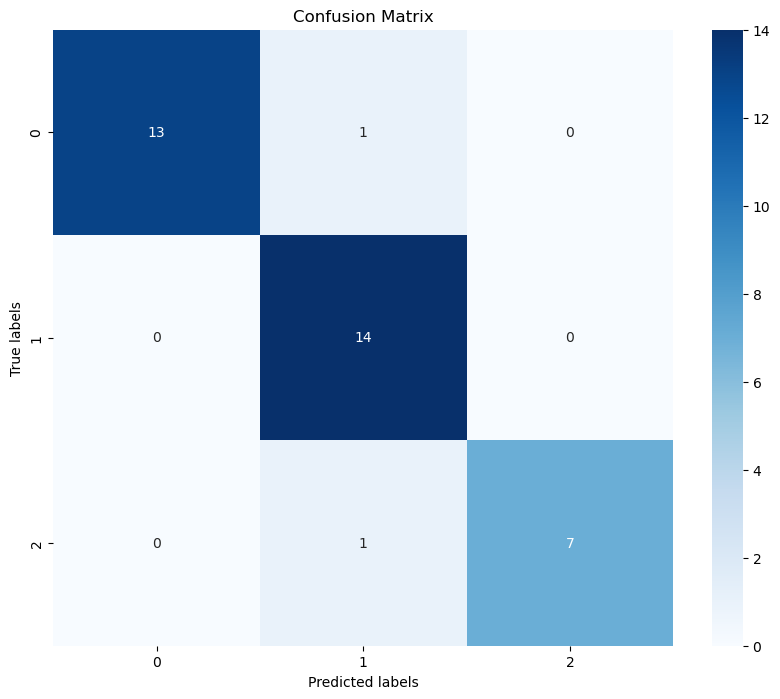

Puntaje en el conjunto de prueba: 0.9444444444444444
Precision (macro): 0.9583333333333334
Precision (micro): 0.9444444444444444
Precision (weighted): 0.9513888888888888
Recall (micro): 0.9444444444444444
F1-score (micro): 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Representación en texto del árbol de decisión:
|--- color_intensity <= 3.82
|   |--- proline <= 790.00
|   |   |--- class: 1
|   |--- proline >  790.00
|   |   |--- class: 1
|--- color_intensity >  3.82
|   |--- flavanoids <= 1.40
|   |   |--- class: 2
|   |--- flavanoids >  1.40
|   |   |--- proline <= 724.50
|   |   |   |--- class: 1
|   |   |--- proline >  724.50
|   |   

In [142]:
from sklearn import tree
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import BaggingClassifier

# Cargar el Wine Dataset
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['Class'] = wine.target

# Separar las características (X) y el objetivo (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Definir el modelo con max_depth=5, min_samples_leaf=5 y criterio="gini"
gini_depth_5 = tree.DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=5, min_samples_leaf=5)

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Entrenar el modelo
gini_depth_5.fit(X_train, y_train)

# Predicciones
y_pred = gini_depth_5.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=list(map(str, np.unique(y))),
            yticklabels=list(map(str, np.unique(y))))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Puntaje en el conjunto de prueba
test_score = gini_depth_5.score(X_test, y_test)
print("Puntaje en el conjunto de prueba:", test_score)

# Métricas de precisión, recall y f1-score
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Precision (micro):", precision_score(y_test, y_pred, average='micro'))
print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (micro):", recall_score(y_test, y_pred, average='micro'))
print("F1-score (micro):", f1_score(y_test, y_pred, average='micro'))

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Visualización del árbol
dot_data = tree.export_graphviz(gini_depth_5, out_file=None, 
                                 feature_names=wine.feature_names,  
                                 class_names=list(map(str, np.unique(y))),  
                                 filled=True, rounded=True,  
                                 special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("wine_gini_depth_5")  # Guardar como PDF
graph.view()

# Representación en texto del árbol de decisión
text_representation = tree.export_text(gini_depth_5, feature_names=wine.feature_names)
print("Representación en texto del árbol de decisión:")
print(text_representation)

# Validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gini_depth_5, X, y, cv=kf)
print("Puntajes de la validación cruzada:", cv_scores)
print("Puntaje promedio de validación cruzada:", cv_scores.mean())
print("Diferencia entre puntaje de validación cruzada y puntaje en el conjunto de prueba:", (cv_scores.mean()) - test_score)

# Bagging Classifier con el árbol de decisión gini_depth_5
bagging_classifier = BaggingClassifier(gini_depth_5, n_estimators=100, bootstrap=True, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Puntaje en el conjunto de prueba
test_score_bagging = bagging_classifier.score(X_test, y_test)
print("Puntaje en el conjunto de prueba con Bagging:", test_score_bagging)

# Generar nuevas observaciones para cada clase
new_observations = []
for class_label in range(3):
    class_data = data[data['Class'] == class_label]
    mean = class_data.mean()[:-1]
    std = class_data.std()[:-1]
    new_observation = np.random.normal(mean, std)
    new_observations.append(new_observation)

new_observations_df = pd.DataFrame(new_observations, columns=wine.feature_names)
new_observations_df['Class'] = range(3)

# Predicciones para nuevas observaciones
etiquetas_predichas = gini_depth_5.predict(new_observations_df.iloc[:, :-1].values)
print("Etiquetas predichas para el nuevo registro:")
print(etiquetas_predichas)


# Modelo con máximo nivel de profundidad 3

"depth_3": tree.DecisionTreeClassifier(max_depth=3)

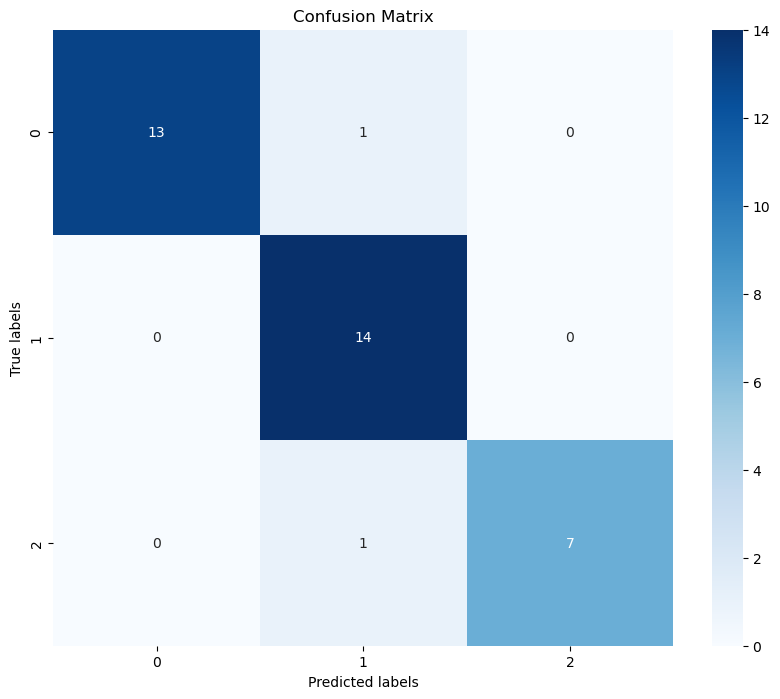

Puntaje en el conjunto de prueba: 0.9444444444444444
Precision (macro): 0.9583333333333334
Precision (micro): 0.9444444444444444
Precision (weighted): 0.9513888888888888
Recall (micro): 0.9444444444444444
F1-score (micro): 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Representación en texto del árbol de decisión:
|--- color_intensity <= 3.82
|   |--- proline <= 1002.50
|   |   |--- ash <= 3.07
|   |   |   |--- class: 1
|   |   |--- ash >  3.07
|   |   |   |--- class: 0
|   |--- proline >  1002.50
|   |   |--- class: 0
|--- color_intensity >  3.82
|   |--- flavanoids <= 1.40
|   |   |--- class: 2
|   |--- flavanoids >  1.40
|   |   |--- p

In [144]:
from sklearn import tree
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import BaggingClassifier

# Cargar el Wine Dataset
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['Class'] = wine.target

# Separar las características (X) y el objetivo (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Definir el modelo con max_depth=3
depth_3 = tree.DecisionTreeClassifier(max_depth=3, random_state=42)

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Entrenar el modelo
depth_3.fit(X_train, y_train)

# Predicciones
y_pred = depth_3.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=list(map(str, np.unique(y))),
            yticklabels=list(map(str, np.unique(y))))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Puntaje en el conjunto de prueba
test_score = depth_3.score(X_test, y_test)
print("Puntaje en el conjunto de prueba:", test_score)

# Métricas de precisión, recall y f1-score
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Precision (micro):", precision_score(y_test, y_pred, average='micro'))
print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (micro):", recall_score(y_test, y_pred, average='micro'))
print("F1-score (micro):", f1_score(y_test, y_pred, average='micro'))

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Visualización del árbol
dot_data = tree.export_graphviz(depth_3, out_file=None, 
                                 feature_names=wine.feature_names,  
                                 class_names=list(map(str, np.unique(y))),  
                                 filled=True, rounded=True,  
                                 special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("wine_depth_3")  # Guardar como PDF
graph.view()

# Representación en texto del árbol de decisión
text_representation = tree.export_text(depth_3, feature_names=wine.feature_names)
print("Representación en texto del árbol de decisión:")
print(text_representation)

# Validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(depth_3, X, y, cv=kf)
print("Puntajes de la validación cruzada:", cv_scores)
print("Puntaje promedio de validación cruzada:", cv_scores.mean())
print("Diferencia entre puntaje de validación cruzada y puntaje en el conjunto de prueba:", (cv_scores.mean()) - test_score)

# Bagging Classifier con el árbol de decisión depth_3
bagging_classifier = BaggingClassifier(depth_3, n_estimators=100, bootstrap=True, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Puntaje en el conjunto de prueba
test_score_bagging = bagging_classifier.score(X_test, y_test)
print("Puntaje en el conjunto de prueba con Bagging:", test_score_bagging)

# Generar nuevas observaciones para cada clase
new_observations = []
for class_label in range(3):
    class_data = data[data['Class'] == class_label]
    mean = class_data.mean()[:-1]
    std = class_data.std()[:-1]
    new_observation = np.random.normal(mean, std)
    new_observations.append(new_observation)

new_observations_df = pd.DataFrame(new_observations, columns=wine.feature_names)
new_observations_df['Class'] = range(3)

# Predicciones para nuevas observaciones
etiquetas_predichas = depth_3.predict(new_observations_df.iloc[:, :-1].values)
print("Etiquetas predichas para el nuevo registro:")
print(etiquetas_predichas)


# Modelo por default

"default": tree.DecisionTreeClassifier()

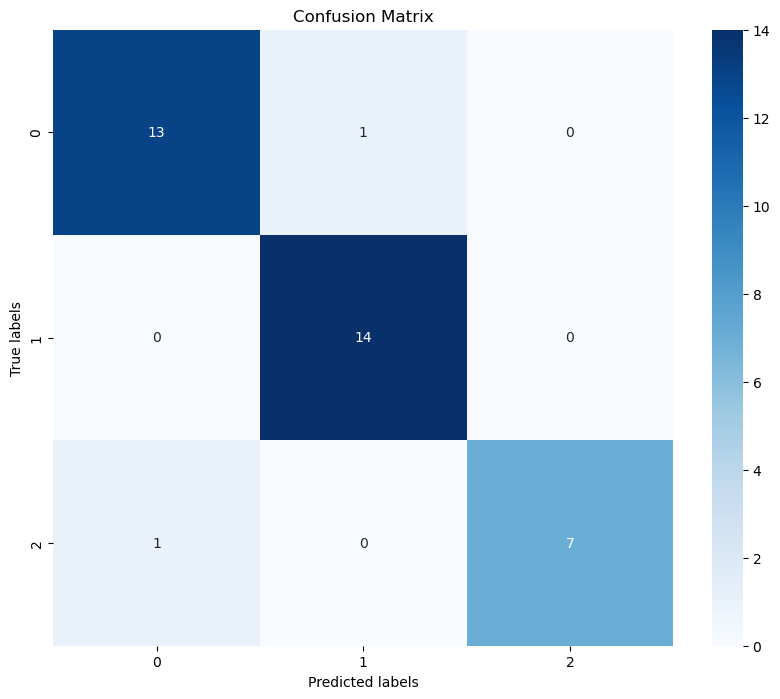

Puntaje en el conjunto de prueba: 0.9444444444444444
Precision (macro): 0.953968253968254
Precision (micro): 0.9444444444444444
Precision (weighted): 0.9462962962962962
Recall (micro): 0.9444444444444444
F1-score (micro): 0.9444444444444444
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Representación en texto del árbol de decisión:
|--- color_intensity <= 3.82
|   |--- proline <= 1002.50
|   |   |--- ash <= 3.07
|   |   |   |--- class: 1
|   |   |--- ash >  3.07
|   |   |   |--- class: 0
|   |--- proline >  1002.50
|   |   |--- class: 0
|--- color_intensity >  3.82
|   |--- flavanoids <= 1.40
|   |   |--- class: 2
|   |--- flavanoids >  1.40
|   |   |--- pr

In [146]:
from sklearn import tree
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import BaggingClassifier

# Cargar el Wine Dataset
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['Class'] = wine.target

# Separar las características (X) y el objetivo (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Definir el modelo con los parámetros por defecto (sin max_depth ni random_state)
default_model = tree.DecisionTreeClassifier()

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Entrenar el modelo
default_model.fit(X_train, y_train)

# Predicciones
y_pred = default_model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=list(map(str, np.unique(y))),
            yticklabels=list(map(str, np.unique(y))))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Puntaje en el conjunto de prueba
test_score = default_model.score(X_test, y_test)
print("Puntaje en el conjunto de prueba:", test_score)

# Métricas de precisión, recall y f1-score
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Precision (micro):", precision_score(y_test, y_pred, average='micro'))
print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (micro):", recall_score(y_test, y_pred, average='micro'))
print("F1-score (micro):", f1_score(y_test, y_pred, average='micro'))

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Visualización del árbol
dot_data = tree.export_graphviz(default_model, out_file=None, 
                                 feature_names=wine.feature_names,  
                                 class_names=list(map(str, np.unique(y))),  
                                 filled=True, rounded=True,  
                                 special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("wine_default")  # Guardar como PDF
graph.view()

# Representación en texto del árbol de decisión
text_representation = tree.export_text(default_model, feature_names=wine.feature_names)
print("Representación en texto del árbol de decisión:")
print(text_representation)

# Validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(default_model, X, y, cv=kf)
print("Puntajes de la validación cruzada:", cv_scores)
print("Puntaje promedio de validación cruzada:", cv_scores.mean())
print("Diferencia entre puntaje de validación cruzada y puntaje en el conjunto de prueba:", (cv_scores.mean()) - test_score)

# Bagging Classifier con el árbol de decisión default_model
bagging_classifier = BaggingClassifier(default_model, n_estimators=100, bootstrap=True, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Puntaje en el conjunto de prueba
test_score_bagging = bagging_classifier.score(X_test, y_test)
print("Puntaje en el conjunto de prueba con Bagging:", test_score_bagging)

# Generar nuevas observaciones para cada clase
new_observations = []
for class_label in range(3):
    class_data = data[data['Class'] == class_label]
    mean = class_data.mean()[:-1]
    std = class_data.std()[:-1]
    new_observation = np.random.normal(mean, std)
    new_observations.append(new_observation)

new_observations_df = pd.DataFrame(new_observations, columns=wine.feature_names)
new_observations_df['Class'] = range(3)

# Predicciones para nuevas observaciones
etiquetas_predichas = default_model.predict(new_observations_df.iloc[:, :-1].values)
print("Etiquetas predichas para el nuevo registro:")
print(etiquetas_predichas)


# Modelo con criterio de entropía

"entropy_depth_5": tree.DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=5, min_samples_leaf=5)

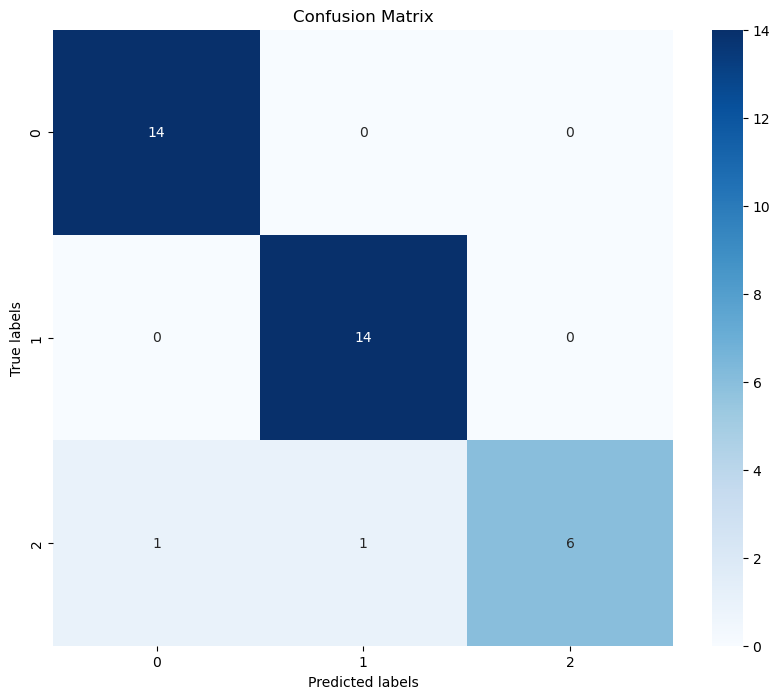

Puntaje en el conjunto de prueba: 0.9444444444444444
Precision (macro): 0.9555555555555556
Precision (micro): 0.9444444444444444
Precision (weighted): 0.9481481481481482
Recall (micro): 0.9444444444444444
F1-score (micro): 0.9444444444444444
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.93      1.00      0.97        14
           2       1.00      0.75      0.86         8

    accuracy                           0.94        36
   macro avg       0.96      0.92      0.93        36
weighted avg       0.95      0.94      0.94        36

Representación en texto del árbol de decisión:
|--- od280/od315_of_diluted_wines <= 2.19
|   |--- color_intensity <= 3.82
|   |   |--- class: 1
|   |--- color_intensity >  3.82
|   |   |--- flavanoids <= 1.29
|   |   |   |--- class: 2
|   |   |--- flavanoids >  1.29
|   |   |   |--- class: 2
|--- od280/od315_of_diluted_wines >  2.19
|   |--- alcohol <= 12.79
|   |   |--- cla

In [150]:
from sklearn import tree
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import BaggingClassifier

# Cargar el Wine Dataset
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['Class'] = wine.target

# Separar las características (X) y el objetivo (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Definir el modelo con max_depth=5 y criterio "entropy"
entropy_depth_5 = tree.DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=5, min_samples_leaf=5)

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Entrenar el modelo
entropy_depth_5.fit(X_train, y_train)

# Predicciones
y_pred = entropy_depth_5.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=list(map(str, np.unique(y))),
            yticklabels=list(map(str, np.unique(y))))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Puntaje en el conjunto de prueba
test_score = entropy_depth_5.score(X_test, y_test)
print("Puntaje en el conjunto de prueba:", test_score)

# Métricas de precisión, recall y f1-score
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Precision (micro):", precision_score(y_test, y_pred, average='micro'))
print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (micro):", recall_score(y_test, y_pred, average='micro'))
print("F1-score (micro):", f1_score(y_test, y_pred, average='micro'))

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Visualización del árbol
dot_data = tree.export_graphviz(entropy_depth_5, out_file=None, 
                                 feature_names=wine.feature_names,  
                                 class_names=list(map(str, np.unique(y))),  
                                 filled=True, rounded=True,  
                                 special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("wine_entropy_depth_5")  # Guardar como PDF
graph.view()

# Representación en texto del árbol de decisión
text_representation = tree.export_text(entropy_depth_5, feature_names=wine.feature_names)
print("Representación en texto del árbol de decisión:")
print(text_representation)

# Validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(entropy_depth_5, X, y, cv=kf)
print("Puntajes de la validación cruzada:", cv_scores)
print("Puntaje promedio de validación cruzada:", cv_scores.mean())
print("Diferencia entre puntaje de validación cruzada y puntaje en el conjunto de prueba:", (cv_scores.mean()) - test_score)

# Bagging Classifier con el árbol de decisión entropy_depth_5
bagging_classifier = BaggingClassifier(entropy_depth_5, n_estimators=100, bootstrap=True, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Puntaje en el conjunto de prueba
test_score_bagging = bagging_classifier.score(X_test, y_test)
print("Puntaje en el conjunto de prueba con Bagging:", test_score_bagging)

# Generar nuevas observaciones para cada clase
new_observations = []
for class_label in range(3):
    class_data = data[data['Class'] == class_label]
    mean = class_data.mean()[:-1]
    std = class_data.std()[:-1]
    new_observation = np.random.normal(mean, std)
    new_observations.append(new_observation)

new_observations_df = pd.DataFrame(new_observations, columns=wine.feature_names)
new_observations_df['Class'] = range(3)

# Predicciones para nuevas observaciones
etiquetas_predichas = entropy_depth_5.predict(new_observations_df.iloc[:, :-1].values)
print("Etiquetas predichas para el nuevo registro:")
print(etiquetas_predichas)
